In [21]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf
import seaborn as sns
import time
import datetime

import poloniex

In [2]:
polo = poloniex.Poloniex()
period = polo.DAY # period of data
end = time.time()
start = end - period * 365 # 1 year

chart = polo.returnChartData('USDT_BTC', period=period, start=start, end=end)

In [17]:
df = DataFrame.from_dict(chart)
timestamp = df['date'].values.tolist() # Series -> ndarray -> list
# timestamp -> year/month/day
date = [datetime.datetime.fromtimestamp(timestamp[i]).date() for i in range(len(timestamp))]
df = df.astype(float)
df['date'] = date
df['timestamp'] = timestamp
df.head()

,date,high,low,open,close,volume,quoteVolume,weightedAverage,timestamp
0,2020-04-23,7124.344336,7124.344336,7124.344336,7124.344336,0.000000e+00,0.000000,7124.344336,1587579554
1,2020-04-23,7723.000000,7026.310884,7126.024193,7553.060485,2.346727e+07,3199.214519,7335.320897,1587600000
2,2020-04-24,7605.555556,7397.041200,7551.384364,7502.897565,1.641349e+07,2183.247717,7517.924269,1587686400
3,2020-04-25,7696.659932,7439.124738,7503.323928,7538.715711,1.665867e+07,2208.694648,7542.313014,1587772800
4,2020-04-26,7700.000000,7483.682284,7538.715711,7694.626301,1.703245e+07,2242.789247,7594.317541,1587859200


In [18]:
df.drop(['quoteVolume', 'weightedAverage'], axis=1, inplace=True)
df.head()

,date,high,low,open,close,volume,timestamp
0,2020-04-23,7124.344336,7124.344336,7124.344336,7124.344336,0.000000e+00,1587579554
1,2020-04-23,7723.000000,7026.310884,7126.024193,7553.060485,2.346727e+07,1587600000
2,2020-04-24,7605.555556,7397.041200,7551.384364,7502.897565,1.641349e+07,1587686400
3,2020-04-25,7696.659932,7439.124738,7503.323928,7538.715711,1.665867e+07,1587772800
4,2020-04-26,7700.000000,7483.682284,7538.715711,7694.626301,1.703245e+07,1587859200


In [19]:
df['EMA20'] = df['open'].ewm(span=20).mean()
df['SMA50'] = df['open'].rolling(window=50).mean()
df.head()

,date,high,low,open,close,volume,timestamp,EMA20,SMA50
0,2020-04-23,7124.344336,7124.344336,7124.344336,7124.344336,0.000000e+00,1587579554,7124.344336,NaN
1,2020-04-23,7723.000000,7026.310884,7126.024193,7553.060485,2.346727e+07,1587600000,7125.226261,NaN
2,2020-04-24,7605.555556,7397.041200,7551.384364,7502.897565,1.641349e+07,1587686400,7281.708962,NaN
3,2020-04-25,7696.659932,7439.124738,7503.323928,7538.715711,1.665867e+07,1587772800,7345.685776,NaN
4,2020-04-26,7700.000000,7483.682284,7538.715711,7694.626301,1.703245e+07,1587859200,7392.378075,NaN


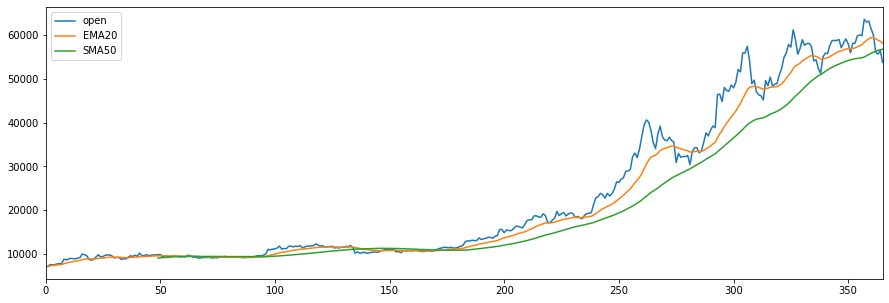

In [20]:
df[['open', 'EMA20', 'SMA50']].plot(subplots=False, figsize=(15, 5))

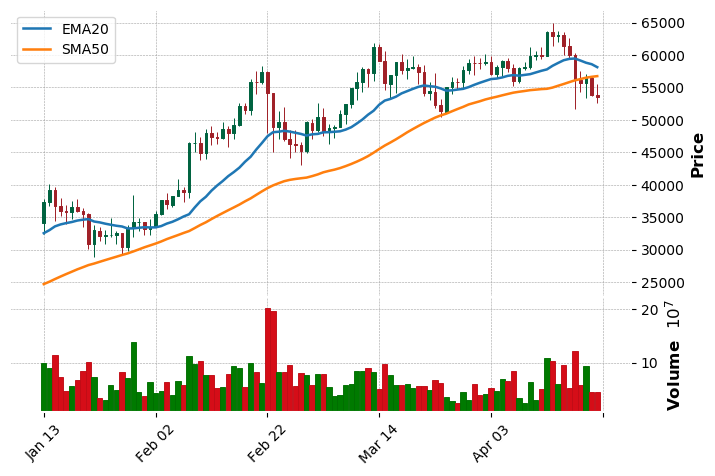

In [38]:
df1 = df.tail(100)
df1.index = pd.to_datetime(df1['date'])
df1 = df1[['open', 'high', 'low', 'close', 'volume', 'EMA20', 'SMA50']]
df1.columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'EMA20', 'SMA50']

addplot = mpf.make_addplot(df1[['EMA20', 'SMA50']])
fig, axes = mpf.plot(
    df1, type='candle', addplot=addplot, volume=True, 
    style='charles', returnfig=True, figratio=(12,8))
axes[0].legend(['EMA20', 'SMA50'])

In [73]:
# ボリンジャーバンド
r = df['open'].rolling(20)
df['upper'] = r.mean() + 2 * r.std()
df['lower'] = r.mean() - 2 * r.std()
df.tail()

,date,high,low,open,close,volume,timestamp,EMA20,SMA50,upper,lower
361,2021-04-18,60343.000000,51680.965955,59996.000000,56170.209301,1.220202e+08,1618704000,59456.292621,56087.521131,63460.558247,55347.092137
362,2021-04-19,57510.346590,54257.000000,56143.975625,55614.391425,5.766105e+07,1618790400,59140.833859,56288.076708,63572.623276,55088.024671
363,2021-04-20,57059.852970,53360.931104,55622.576359,56468.763633,9.288573e+07,1618876800,58805.761716,56497.126487,63725.654442,54622.451141
364,2021-04-21,56760.948006,53610.000000,56438.783128,53771.354216,4.481054e+07,1618963200,58580.335184,56634.114560,63770.507621,54347.957051
365,2021-04-22,55470.545734,52618.846807,53771.944241,53483.850284,4.513076e+07,1619049600,58122.393190,56741.240161,64082.993250,53537.765846


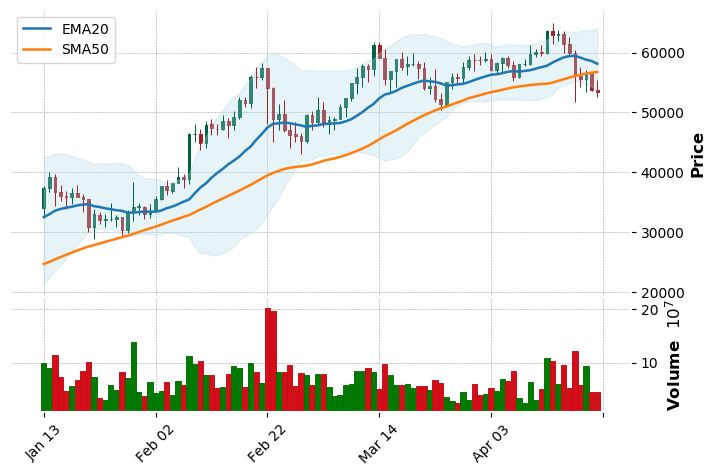

In [80]:
df1 = df.tail(100)
df1.index = pd.to_datetime(df1['date'])
df1 = df1[['open', 'high', 'low', 'close', 'volume', 'EMA20', 'SMA50', 'upper', 'lower']]
df1.columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'EMA20', 'SMA50', 'upper', 'lower']

addplot = mpf.make_addplot(df1[['EMA20', 'SMA50']]) # 追加のグラフ
fig, axes = mpf.plot(
    df1, type='candle', # ローソク足
    addplot=addplot, # グラフを追加
    volume=True, # 出来高
    # ボリンジャーバンド
    fill_between=dict(y1=df1['lower'].values, y2=df1['upper'].values, color='lightblue', alpha=.3),
    style='charles', #スタイルを変更
    returnfig=True, # legendを表示するため、axesをreturn
    figratio=(12,8))
axes[0].legend(['EMA20', 'SMA50'], loc=2) # 左上にlegend
# plt.savefig('../../Output/technical_btc.png')